<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artificial Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2022

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 1
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  1 Aban
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

<h1> Personal Info </h1>
<br>
<font size=3>
    
student_number =   

    
Name =  

Last_Name =  
    </font>

<h1> Rules</h1>
<br>
<font size=3>
- This assignment is due Aban 1th at 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Aban 11th at 23:59:59.
    </font>

<h1> Rules</h1>
<br>
<font size=3>
Convexity_check: 30
	10 -> Convexity Check
	20 -> Visualize and Check Convexity for 3 functions
		6 -> 1st function (Check Convexity + visualize it and exception value and interval)
		6 -> 2nd function
		6 -> 3rd function
		2 -> visualization implementation
GD: 70
	10 -> grad function
	20 -> each section
		4 -> analysis and description
		rest -> implementation and visualization
</font>

<h1> Requirements </h1>
    <br>
    <font size=3>
Assignment's required and recommended libraries are imported here.
    </font>

In [1]:
!pip install tqdm
!pip install -- upgrade matplotlib
!pip install  seaborn

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import pandas as pd
from collections import namedtuple

<h1> Convexity Check </h1>
    <br>
    
<font size=3>
Some functions are given here which are needed to be classified as convex or non-convex. You need to implement them and check their convexity. Any brute force method is acceptable as long as you specify whether or not these are convex and in case of being non-convex what their exception interval and middle point are according to convexity check formula:
</font>    

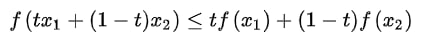

<font size=3>
Here, $tx_1 + (1-t)x_2$ is the exception middle point where given $t$ conteradicts previous inequality and your exception interval is $(x_1,x_2)$
    
At last, you need to visualize these functions in $R^2$ (for all functions) as well as their exception intervall [line] and exception middle point (if non-convex).

To select the general considered domain of these functions every applicable domain is acceptable for non-convex ones, and in case of convex ones, domain has to be large enough to show the overal trend of the function.  
    
</font>

<font size=3>

a)
$f_1(x) = e^{(|x^{10}-x^8|)}$
<br/>
b)
$f_2(x) = e^{x^2 + 2x + \frac{1}{x}} \quad for \quad x \in (0, \infty)$
<br/>
c)
$f_3(x) = -\log{|2 cos(x) + \frac{100}{x}|} $
    
</font>

In [3]:
def f1(x):
    # implementation of f1 according to previous formula
    return np.exp(np.abs(np.power(x, 10) - np.power(x, 8)))


def f2(x):
    # implementation of f2 according to previous formula
    return np.exp(np.power(x, 2) + 2 * x + (1 / x))


def f3(x):
    # implementation of f3 according to previous formula
    return -np.log10(np.abs(2 * np.cos(x) + (100 / x)))


In [4]:
ConvexityResult = namedtuple(
    "ConvexityResult", ["is_convex", "exc_interval", "exc_mid_pt"]
)

CHECK_CONVEXITY_ITERATION_COUNT = 50000


def _get_start_and_end_interval(start, end):
    a = np.random.uniform(start, end)
    b = np.random.uniform(start, end)

    return (a, b) if a < b else (b, a)


def _get_middle_point(a, b, theta):
    return theta * a + (1 - theta) * b


def check_convexity(func, start_interval, end_interval):
    # Check the input function for convexity
    is_convex = True
    exc_start_pt = None
    exc_end_pt = None
    exc_mid_pt = None
    for _ in range(CHECK_CONVEXITY_ITERATION_COUNT):
        a, b = _get_start_and_end_interval(start_interval, end_interval)
        theta = np.random.uniform(0, 1)
        middle = _get_middle_point(a, b, theta)

        if func(middle) > theta * func(a) + (1 - theta) * func(b):
            is_convex = False
            exc_start_pt = a
            exc_end_pt = b
            exc_mid_pt = middle
            break

    res = ConvexityResult(is_convex, (exc_start_pt, exc_end_pt), exc_mid_pt)
    # if is_convex == True then exc values are None
    return res

res1 = check_convexity(f1, 0, 2)
res2 = check_convexity(f2, 0.05, 10)
res3 = check_convexity(f3, -2, 2)
print(res1)
print(res2)
print(res3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11320\3041306348.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(np.abs(np.power(x, 10) - np.power(x, 8)))


ConvexityResult(is_convex=False, exc_interval=(0.6034051190865668, 0.9373422891789183), exc_mid_pt=0.719761421973608)
ConvexityResult(is_convex=True, exc_interval=(None, None), exc_mid_pt=None)
ConvexityResult(is_convex=False, exc_interval=(0.7253960075590471, 1.9746927866393125), exc_mid_pt=1.6277157179838235)


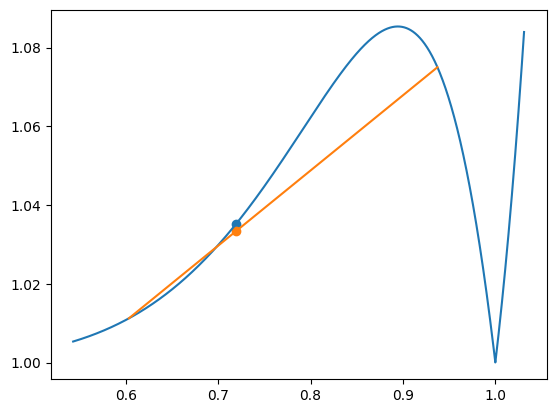

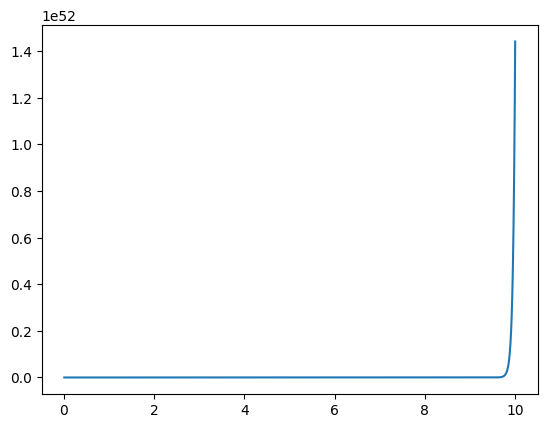

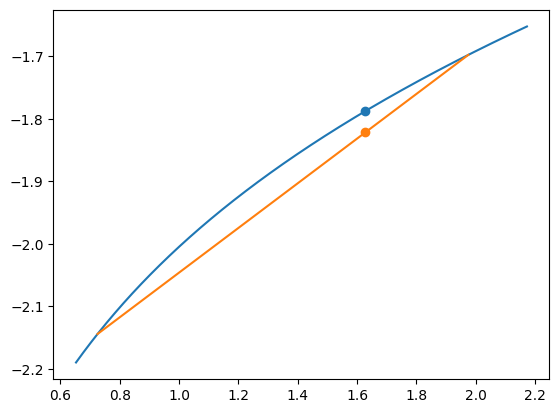

In [5]:
def _get_line(point1, point2):
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]

    m = (y2 - y1) / (x2 - x1)

    c = y1 - m * x1

    def func(x):
        return m * x + c

    return func


def visualize(func, convexity_res: ConvexityResult, start_interval, end_interval):
    is_convex = convexity_res.is_convex
    exc_start_pt = convexity_res.exc_interval[0]
    exc_end_pt = convexity_res.exc_interval[1]
    exc_mid_pt = convexity_res.exc_mid_pt

    if not is_convex:
        start_interval = exc_start_pt - 0.1 * np.abs(exc_start_pt)
        end_interval = exc_end_pt + 0.1 * np.abs(exc_end_pt)

    # visualize the input function
    x = np.linspace(start_interval, end_interval, 10000)
    plt.plot(x, func(x))

    # if non convex show exception interval
    if not is_convex:
        x = np.linspace(exc_start_pt, exc_end_pt)
        point1 = (exc_start_pt, func(exc_start_pt))
        point2 = (exc_end_pt, func(exc_end_pt))
        line_func = _get_line(point1, point2)
        plt.plot(x, line_func(x))

        plt.scatter(exc_mid_pt, func(exc_mid_pt))
        plt.scatter(exc_mid_pt, line_func(exc_mid_pt))
    plt.show()

visualize(f1, res1, 0, 2)
visualize(f2, res2, 0.01, 10)
visualize(f3, res3, 0, 2)

<h1> Continuous Optimization</h1>
 
<br> 
<font size=3> 
Here, you need to implement the Gradient Descent (GD) method to minimize the given function. This function ( $f(x,y)$ ) consists of multiple modals which causes some local minimas. Then, you need to examine two types of augmentation on GD. First, a mechanism similar to Simulated Anealing (SA) which we will recall as learning rate decay and second, adding momentum to update equation of GD.
    <br>
    Provide visualization and an explanation for the behaviour of all GD variations: GD, GD+lr_decay, and GD+momentum.
    </font>

In [6]:
def g(x, y):
    return np.cos(x)*np.cos(y)*np.exp(-x**2-y**2)

def f(x, y):
    return -g(2*x,2*y) + \
        0.05*g(2*x + 0.5, 2*y + 0.5) - 0.1*g(x + 1, y + 1) + \
        0.05*g(2*x + 0.5, 2*y - 0.5) - 0.1*g(x + 1, y - 1) + \
        0.05*g(2*x - 0.5, 2*y + 0.5) - 0.1*g(x - 1, y + 1) + \
        0.05*g(2*x - 0.5, 2*y - 0.5) - 0.1*g(x - 1, y - 1)

<font size=3>
    The following figure shows how this function would look like in $R^3$ space:

</font>

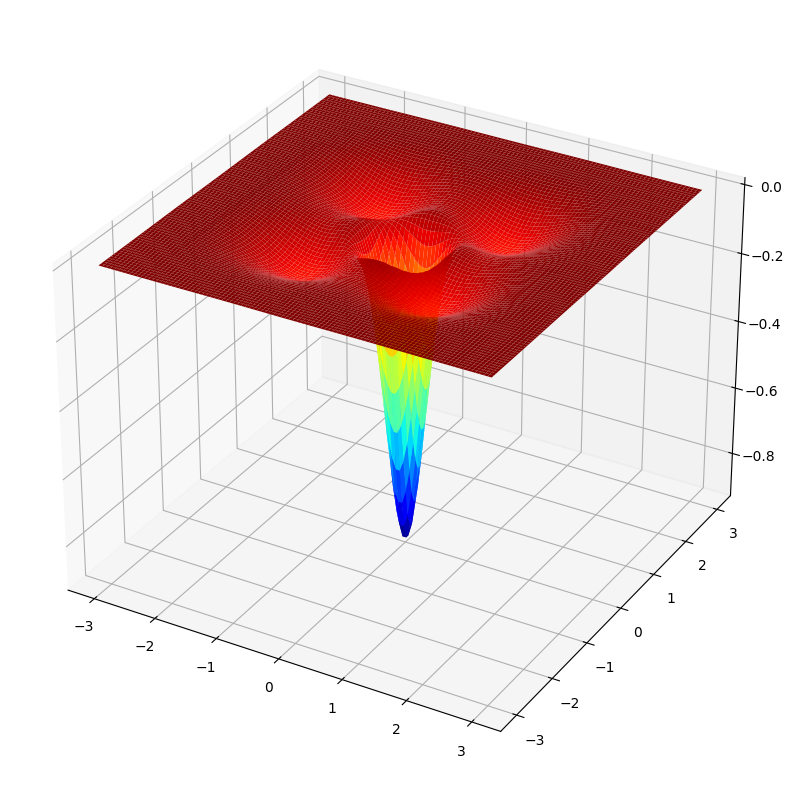

In [7]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
plt.show()

<font size=3>
    All these 3 scenarios need a gradient function which is to be implemented using <u><b>numeric</b></u> methods:
</font>

In [8]:
def grad(func, x, y, eps=1e-8):
    # Calculate gradient for the input function using numeric methods
    # subjected to input values: x, y
    x_grad = (
        -func(x + 2 * eps, y)
        + 8 * func(x + eps, y)
        - 8 * func(x - eps, y)
        + func(x - 2 * eps, y)
    ) / (12 * eps)
    y_grad = (
        -func(x, y + 2 * eps)
        + 8 * func(x, y + eps)
        - 8 * func(x, y - eps)
        + func(x, y - 2 * eps)
    ) / (12 * eps)

    return (x_grad, y_grad)


<font size=3>
    You also need to visualize the updating path from the start point to the convergence. Addressing multiple experiments for each scenario (i.e. multiple initial points), you can just visualize one experiment with the result closest to average of all resutls (of that scenario) or just visualize any experiment that suits best to the explanation you're going to provide for this scenario.
    <br><br>
    An example is provided here:
</font>

In [9]:
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [10]:
def path_visualize(pts):
    global X, Y, Z
    # pts: [N, 2]
    # visualizes input array of points constructing convergence path
    plt.figure(figsize=(10, 10))
    plt.contour(X, Y, np.exp(Z)**10, cmap='Spectral')
    a_x, a_y = np.array(pts).T
    plt.plot(a_x, a_y, color='red')

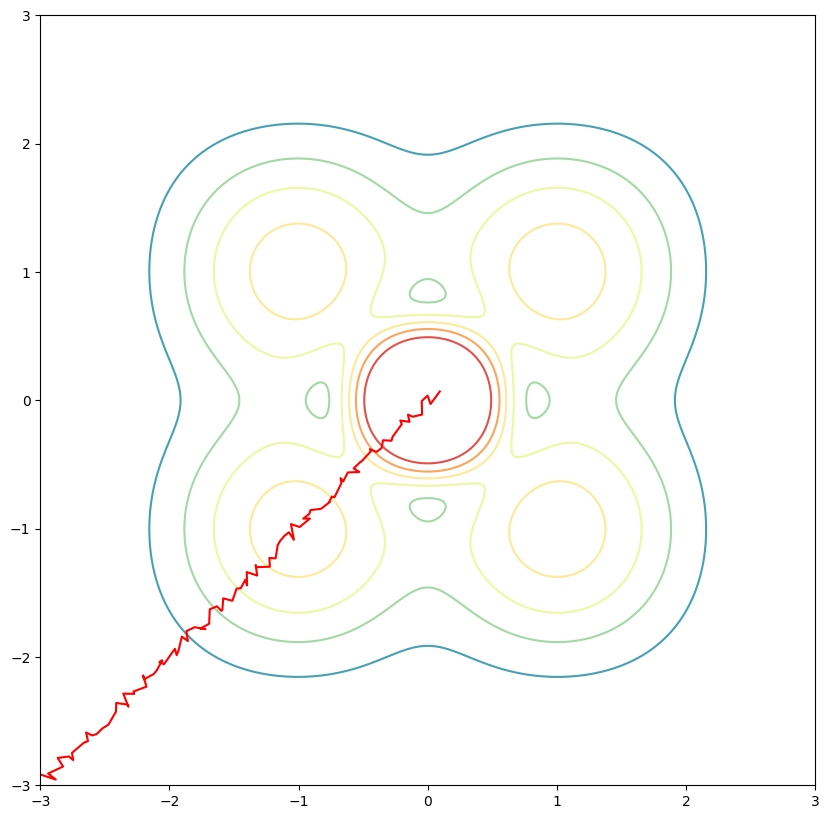

In [11]:
# An example to show how path_visualize looks like
pts = np.array([np.linspace(-3, 0, 100), np.linspace(-3, 0, 100)]).T
pts += np.random.rand(pts.shape[0], 2)/10

path_visualize(pts)

### Vanila GD

<font size=3>
    The first scenario is the simple, original Gradient Descent. You need to analyze and explain the effect of different constant learning rates ( [0.001, 0.01, 0.1, 1, 10] ). Run optimization steps for 10000 iterations and from 5 different random initial points.
</font>

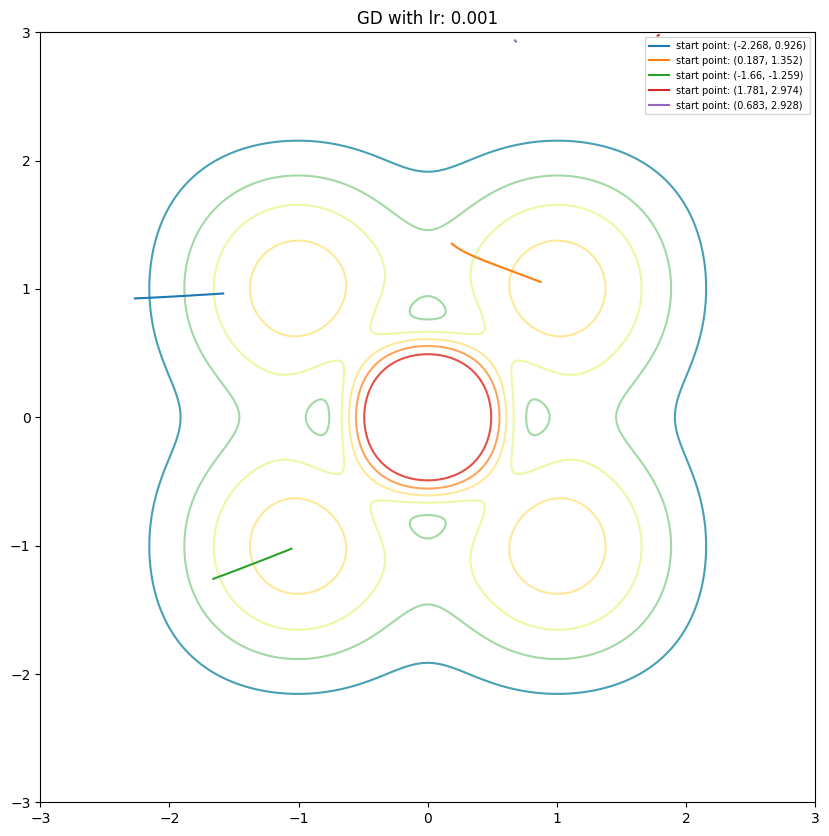

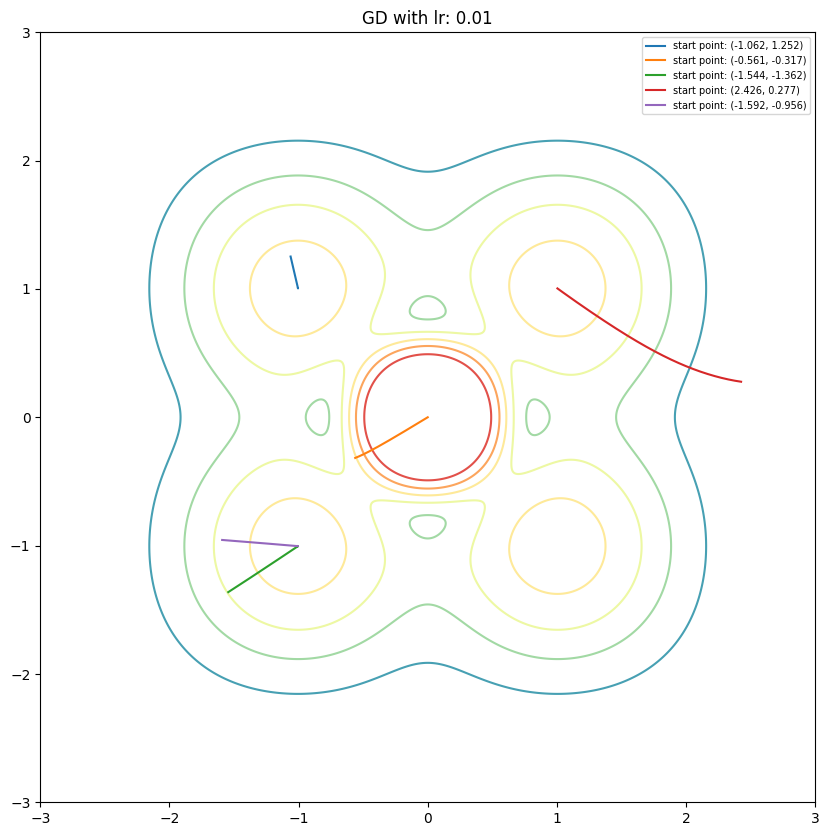

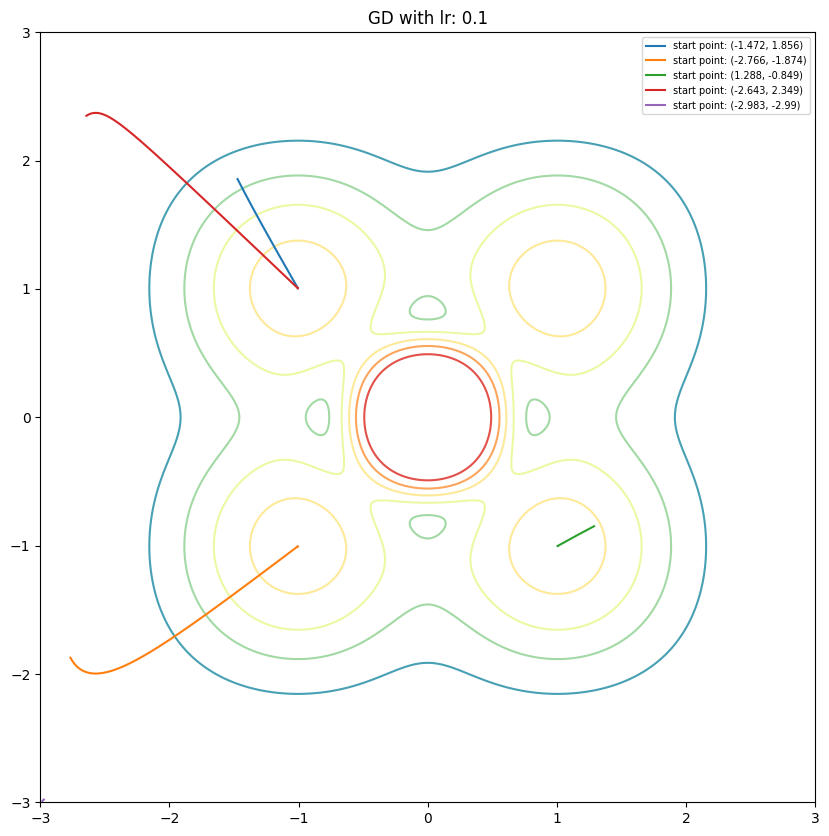

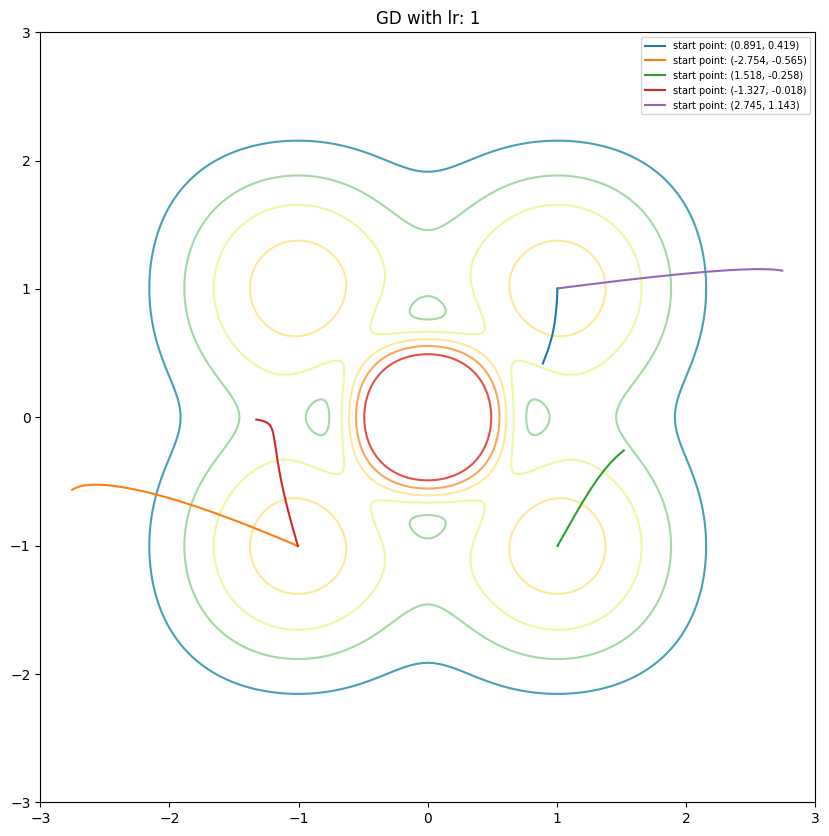

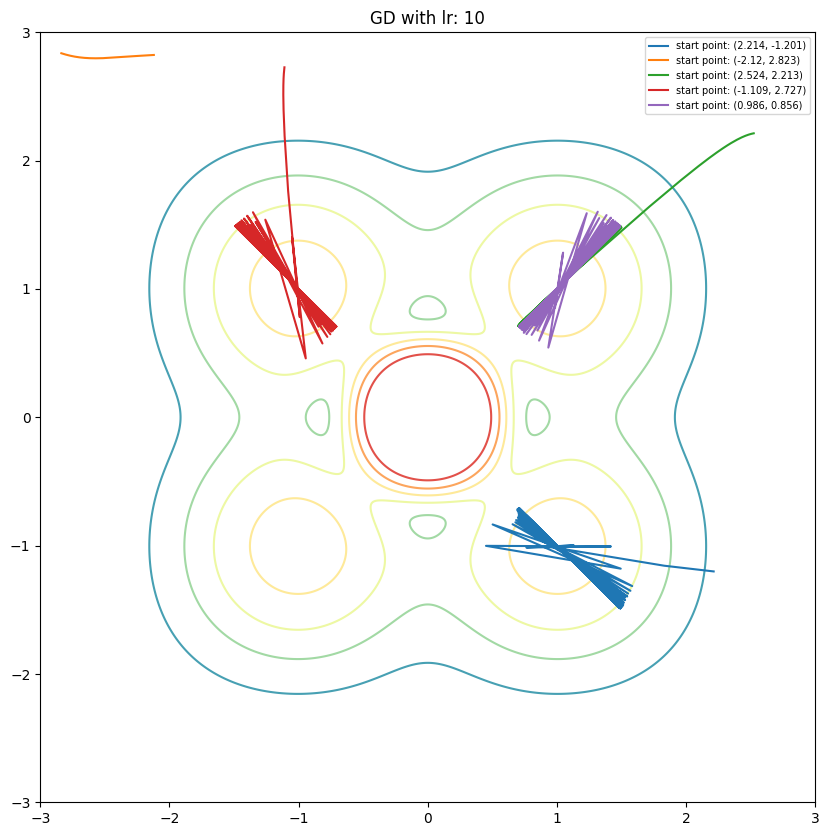

In [22]:
def GD(func, init_x, init_y, lr, max_iter):
    # Perform gradient descent update iterations
    x = init_x
    y = init_y
    pts = [[x, y]]
    for _ in range(max_iter):
        x_grad, y_grad = grad(func, x, y)
        x -= lr * x_grad
        y -= lr * y_grad
        pts.append([x, y])

    return np.array(pts)


def minimize(func, lr, max_iter=10000):
    global X, Y, Z
    plt.figure(figsize=(10, 10))
    plt.contour(X, Y, np.exp(Z) ** 10, cmap="Spectral")
    plt.title(f"GD with lr: {lr}")

    # minimize the given function and visaulize the results
    for _ in range(5):
        init_x = np.random.uniform(-3, 3)
        init_y = np.random.uniform(-3, 3)
        pts = GD(func, init_x, init_y, lr, max_iter)

        a_x, a_y = np.array(pts).T
        plt.plot(a_x, a_y, label=f"start point: ({round(init_x,3)}, {round(init_y,3)})")
        plt.legend(fontsize=7)
    plt.show()


for lr in [0.001, 0.01, 0.1, 1, 10]:
    minimize(f, lr)


<div dir="rtl">
با توجه به شکل ها و فرمول مربوط به GD می‌توان گفت که هر چه lr بیشتر باشد،
اختلاف دو نقطه طی شده در مسیر افزایش می‌یابد، از طرفی اگر مقدار lr از مقدار معقولی بیشتر باشد، مسیر طی شده به نقطه‌ی خاصی
converge نخواهد کرد.<br/>

در مثال بالا، به ازای lr = 0.001 به ازای نقاطی که از local minima دور هستند، مسیر به نقطه‌ی local minima ای converge نمی‌شود.
اما به ازای lr = [0.01, 0.1, 1] این مشکل تا حدی وجود ندارد.
به ازای lr = 10 نقاط به نزدیک ترین local minima کشیده می‌شوند اما به دلیل بزرگ بودن lr به نقطه‌ای converge نمی‌شود.
<br/>

مشکل اساسی این است که در این الگوریتم ، نزدیک‌‌‌ترین local minima پیدا می‌شود که با هدف ما که پیدا کردن global minima است در تناقض است.

</div>


### LR decay GD

<font size=3>
   Now we want to better GD's performance by augmenting the learning rate (lr) and adding a decay effect through iterations.  
 <br>  <br> 
You need to implement a mechanism similar to Simulated Anealing (SA) to modify learning rate (lr) during runtime. The initial value for lr can be 0.5 and how you change it should be according to the SA lecture. Again, random initial points, analysis and visualization are required.
    <br><br>
</font>

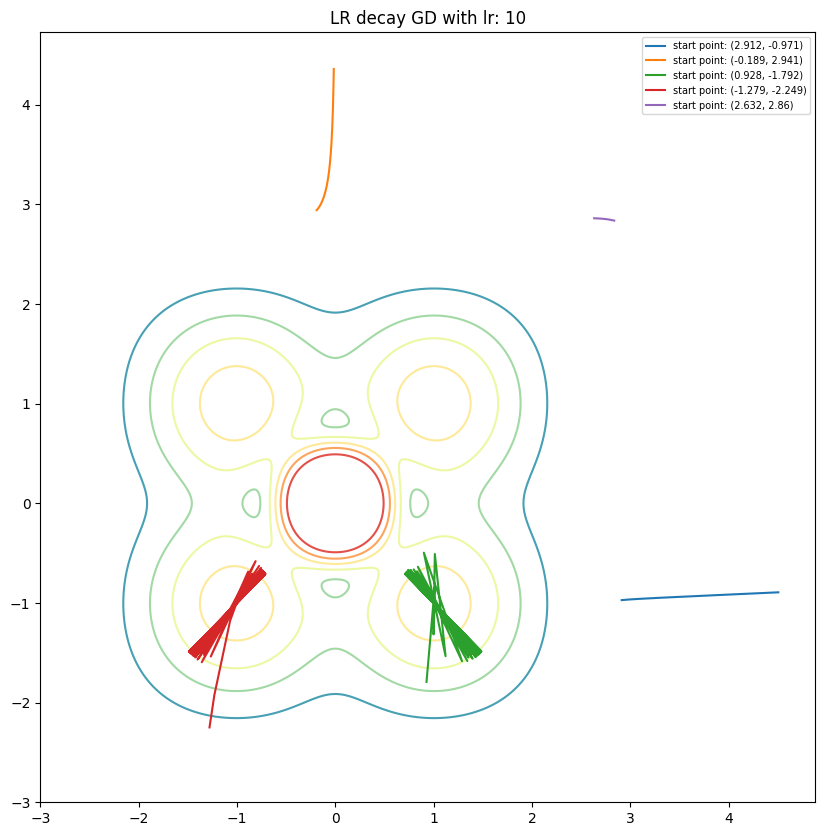

In [21]:
def GD_variable_lr(func, init_x, init_y, lr_init, max_iter):
    # perform GD with learning rate varying by temprature
    x = init_x
    y = init_y
    lr = lr_init
    decay = lr_init / max_iter
    pts = [[x, y]]
    
    for _ in range(max_iter):
        x_grad, y_grad = grad(func, x, y)
        x -= lr * x_grad
        y -= lr * y_grad
        lr -= decay
        pts.append([x, y])

    return np.array(pts)


def minimze_variable_lr(func, lr_init, max_iter=10000):
    # minimze the given function and visaulize the results

    global X, Y, Z
    plt.figure(figsize=(10, 10))
    plt.contour(X, Y, np.exp(Z) ** 10, cmap="Spectral")
    plt.title(f"LR decay GD with lr: {lr_init}")

    # minimize the given function and visaulize the results
    for _ in range(5):
        init_x = np.random.uniform(-3, 3)
        init_y = np.random.uniform(-3, 3)
        pts = GD_variable_lr(func, init_x, init_y, lr_init, max_iter)

        a_x, a_y = np.array(pts).T
        plt.plot(
            a_x, a_y, label=f"start point: ({round(init_x, 3)}, {round(init_y, 3)})"
        )
        plt.legend(fontsize=7)
    plt.show()


minimze_variable_lr(f, 10)


<div dir="rtl">
در این روش با کوچک‌کردن تدریجی مقدار lr در نزدیکی نقاط local minima، مشکل converge نشدن حل می‌شود.
<br/>

در این روش نیز همچنان مشکل پیدا نشدن global minima وجود دارد.

</div>


### GD with momentum

<font size=3>
    Momentum is a mechanism which accelerates gradient vectors in the right direction and helps with faster convergence when it comes to the stochastic GD. Briefly saying a simple change in GD update equation will do the work. What happens is that we store the previous state of our updating parameter(s) and use it to simulate a momentum for updating path. The detailed explanation can be find <a href='https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d'>here</a>. 
   This technique is widely used for Stochastic GD. Here, we want to examine it on a double parameter scenario. The update equation is here:
    <br><br>
</font>
<font size=4>
     $$ X_t = X_t - \gamma(\beta X_{t-1} + (1-\beta)\nabla_Xf(X))$$
    </font>
    <br>
<font size=3>
   After performing the experiments, provide your analysis and visualization (path_visualize). 
    <br><br>
</font>

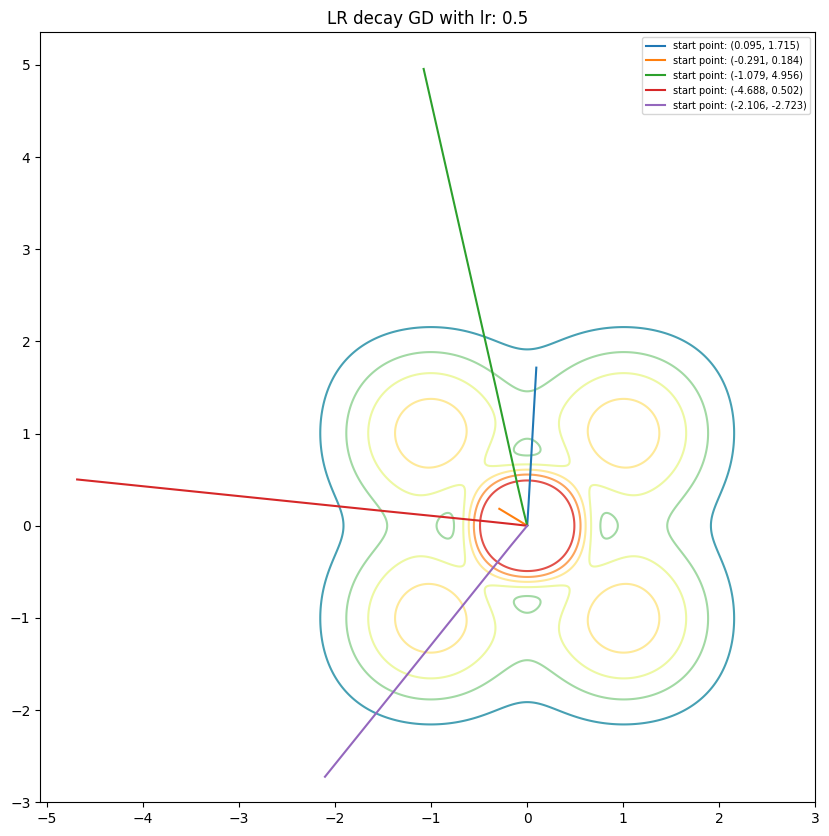

In [20]:
def GD_momentum(func, init_x, init_y, lr, max_iter):
    # add momentum to GD update equation
    x = init_x
    y = init_y
    pts = [[x, y]]
    beta = 0.9
    gamma = lr
    for i in range(1, max_iter + 1):
        x_grad, y_grad = grad(func, x, y)
        x = pts[i - 1][0] - gamma * (beta * pts[i - 1][0] + (1 - beta) * x_grad)
        y = pts[i - 1][1] - gamma * (beta * pts[i - 1][1] + (1 - beta) * y_grad)

        pts.append([x, y])

    return np.array(pts)


def minimze_momentum(func, lr, max_iter=10000):
    # minimze the given function and visaulize the results
    global X, Y, Z
    plt.figure(figsize=(10, 10))
    plt.contour(X, Y, np.exp(Z) ** 10, cmap="Spectral")
    plt.title(f"LR decay GD with lr: {lr}")

    # minimize the given function and visaulize the results
    for _ in range(5):
        init_x = np.random.uniform(-5, 5)
        init_y = np.random.uniform(-5, 5)
        pts = GD_momentum(func, init_x, init_y, lr, max_iter)

        a_x, a_y = np.array(pts).T
        plt.plot(
            a_x, a_y, label=f"start point: ({round(init_x, 3)}, {round(init_y, 3)})"
        )
        plt.legend(fontsize=7)
    plt.show()

minimze_momentum(f, 0.5)


<div dir="rtl">
در این روش با در نظر گرفتن استیت قبل باعث می‌شود باعث می‌شود تا جهت درستی برای ادامه‌ی مسیر انتخاب شود که باعث سریع‌تر شدن کانورج می‌شود.
<br/>
در این روش نقطه‌ی مینیمالی که پیدا می‌شود، نقطه‌ی global minima می‌باشد.
</div>


$$ X_t = X_{t-1} - \gamma(\beta X_{t-1} + (1-\beta)\nabla_Xf(X))$$